The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 
Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [570]:
df = pd.read_csv('/Users/april.liu/Documents/ds practice/Train_storesales.csv')

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [246]:
df[df['Item_Identifier'] == 'FDA15']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.300000,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,Other,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.300000,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.300000,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.300000,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,Other,Tier 3,Grocery Store,498.0184
5413,FDA15,9.300000,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,13.426069,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.300000,LF,0.016113,Dairy,248.8092,OUT017,2007,Other,Tier 2,Supermarket Type1,5976.2208


Variable
Description
Item_Identifier
Unique product ID
Item_Weight
Weight of product
Item_Fat_Content
Whether the product is low fat or not
Item_Visibility
The % of total display area of all products in a store allocated to the particular product
Item_Type
The category to which the product belongs
Item_MRP
Maximum Retail Price (list price) of the product
Outlet_Identifier
Unique store ID
Outlet_Establishment_Year
The year in which store was established
Outlet_Size
The size of the store in terms of ground area covered
Outlet_Location_Type
The type of city in which the store is located
Outlet_Type
Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales
Sales of the product in the particulat store. This is the outcome variable to be predicted.
 

data exploration

how many item_identifier do we have?

In [11]:
len(set(df.Item_Identifier))

1559

In [20]:
df.Item_Identifier.value_counts()

FDW13    10
FDG33    10
DRN47     9
FDD38     9
FDV60     9
FDU12     9
FDX04     9
FDX20     9
FDP25     9
FDQ40     9
NCI54     9
FDG09     9
FDT07     9
NCJ30     9
FDF52     9
FDW26     9
FDV38     9
NCL31     9
FDF56     9
NCY18     9
FDW49     9
FDX31     9
FDO19     9
NCQ06     9
DRE49     9
NCB18     9
NCF42     9
NCK05     8
FDG38     8
FDY56     8
         ..
FDB10     2
FDU43     2
DRC24     2
FDP15     2
NCV18     2
DRE01     2
NCW30     2
FDA48     2
FDM38     2
DRL59     2
FDR57     2
FDD48     2
FDD22     2
NCW05     2
FDE38     2
FDH22     2
FDE39     2
NCS41     2
FDI36     2
NCG19     2
NCM42     2
FDQ60     1
FDO33     1
FDC23     1
FDY43     1
FDN52     1
FDT35     1
DRF48     1
FDK57     1
FDE52     1
Name: Item_Identifier, dtype: int64

item_weight distribution

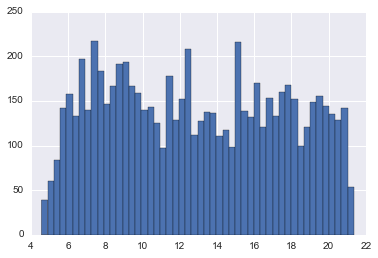

In [14]:
df.Item_Weight.hist(bins = 50)

Item_Weight by Item_Identifier

In [19]:
df.groupby('Item_Identifier').agg({'Item_Weight': np.mean}).unstack()

             Item_Identifier
Item_Weight  DRA12              11.600
             DRA24              19.350
             DRA59               8.270
             DRB01               7.390
             DRB13               6.115
             DRB24               8.785
             DRB25              12.300
             DRB48              16.750
             DRC01               5.920
             DRC12              17.850
             DRC13               8.260
             DRC24              17.850
             DRC25               5.730
             DRC27              13.800
             DRC36              13.000
             DRC49               8.670
             DRD01              12.100
             DRD12               6.960
             DRD13              15.000
             DRD15              10.600
             DRD24              13.850
             DRD25               6.135
             DRD27              18.750
             DRD37               9.800
             DRD49               9.

how does Item_Fat_Content related to sales

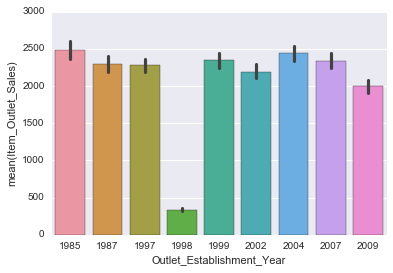

In [29]:
sns.barplot(x='Outlet_Establishment_Year', y = 'Item_Outlet_Sales',  data = df)

relationship between Item_MRP and Item_Outlet_Sales

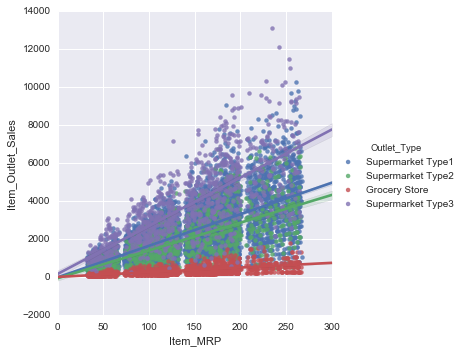

In [517]:
sns.lmplot(x='Item_MRP', y = 'Item_Outlet_Sales', data = df, hue='Outlet_Type')

check missing values by column

In [31]:
df.columns

Index([u'Item_Identifier', u'Item_Weight', u'Item_Fat_Content',
       u'Item_Visibility', u'Item_Type', u'Item_MRP', u'Outlet_Identifier',
       u'Outlet_Establishment_Year', u'Outlet_Size', u'Outlet_Location_Type',
       u'Outlet_Type', u'Item_Outlet_Sales'],
      dtype='object')

In [37]:
df.isnull().sum()
    

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [45]:
df.pivot_table( columns='Item_Identifier', values = 'Item_Weight', aggfunc = np.mean).reset_index()

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
5,DRB24,8.785
6,DRB25,12.300
7,DRB48,16.750
8,DRC01,5.920
9,DRC12,17.850


check methods to fill in item weight missing values

didn't choose item_identifier because data is too small

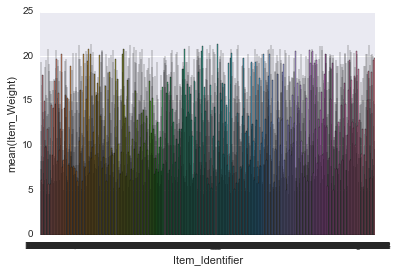

In [46]:
sns.barplot( x = 'Item_Identifier', y = 'Item_Weight', data = df.pivot_table( columns='Item_Identifier', values = 'Item_Weight', aggfunc = np.mean).reset_index() )

In [48]:
from scipy import stats

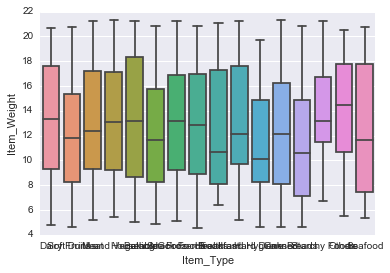

In [50]:
sns.boxplot(x='Item_Type', y = 'Item_Weight', data = df)

anova?

In [53]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

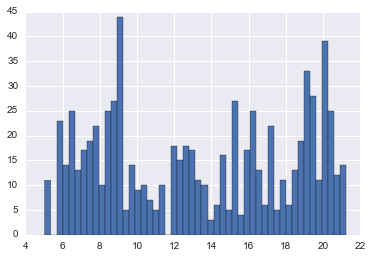

In [60]:
df[df.Item_Type == 'Household']['Item_Weight'].hist(bins=50)

In [63]:
df= df.dropna()

In [64]:
f,p = stats.f_oneway(df[df.Item_Type == 'Fruits and Vegetables']['Item_Weight'],df[df.Item_Type == 'Snack Foods']['Item_Weight'],
                    df[df.Item_Type == 'Household']['Item_Weight'], df[df.Item_Type == 'Frozen Foods']['Item_Weight'],
                    df[df.Item_Type == 'Dairy']['Item_Weight'],df[df.Item_Type == 'Canned']['Item_Weight'], df[df.Item_Type == 'Baking Goods']['Item_Weight'],
                     df[df.Item_Type == 'Health and Hygiene']['Item_Weight'], df[df.Item_Type == 'Soft Drinks']['Item_Weight'],
                     df[df.Item_Type == 'Meat']['Item_Weight'], df[df.Item_Type == 'Breads']['Item_Weight'],
                     df[df.Item_Type == 'Hard Drinks']['Item_Weight'],df[df.Item_Type == 'Others']['Item_Weight'], 
                     df[df.Item_Type == 'Starchy Foods']['Item_Weight'],
                     df[df.Item_Type == 'Breakfast']['Item_Weight'],
                     df[df.Item_Type == 'Seafood']['Item_Weight']
                    )

In [65]:
p

3.3779120094623421e-11

In [71]:
df.Item_Weight

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
5       10.395
6       13.650
7          NaN
8       16.200
9       19.200
10      11.800
11      18.500
12      15.100
13      17.600
14      16.350
15       9.000
16      11.800
17       9.000
18         NaN
19      13.350
20      18.850
21         NaN
22      14.600
23         NaN
24      13.850
25      13.000
26       7.645
27      11.650
28       5.925
29         NaN
         ...  
8493     7.420
8494    15.200
8495     9.695
8496     7.420
8497    13.650
8498    15.350
8499    11.600
8500    20.350
8501     5.340
8502     8.420
8503    20.500
8504       NaN
8505    10.500
8506    17.250
8507     5.880
8508    11.350
8509     8.100
8510    13.800
8511    17.500
8512    20.700
8513    12.000
8514    15.000
8515    20.700
8516    18.600
8517    20.750
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, dtype: float64

In [333]:
df.Item_Weight = df[['Item_Identifier', 'Item_Weight']].groupby('Item_Identifier').transform(lambda x: x.fillna(x.mean()))

try to figure out outlet size missing values

In [73]:
df[df.Outlet_Size.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972


treat them as another category

In [334]:
df.Outlet_Size = df.Outlet_Size.fillna('Other')

Do we have any outliers?

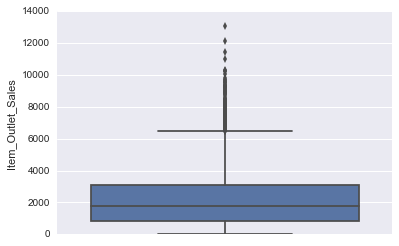

In [77]:
sns.boxplot(y = 'Item_Outlet_Sales', data = df)

In [80]:
df.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

my question: I didn't see any linear relation, should I still use linear relation or non-linear model?

In [571]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import cross_validation

In [572]:
test = pd.read_csv('/Users/april.liu/Documents/ds practice/Test_storesales.csv')

In [573]:
df['check'] = 'train'

In [574]:
test['check'] = 'test'

In [575]:
com_1= pd.concat([df.drop('Item_Outlet_Sales', axis=1), test])

In [576]:
com_1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,check
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,train


In [577]:
com_1.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
check                           0
dtype: int64

In [578]:
com_1['Item_Weight'] = com_1[['Item_Identifier', 'Item_Weight']].groupby('Item_Identifier').transform(lambda x: x.fillna(x.mean()))

In [579]:
com_1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
check                           0
dtype: int64

In [580]:
com_1['Outlet_Size'] = com_1['Outlet_Size'].fillna('Other')

features

In [581]:
df.columns

Index([u'Item_Identifier', u'Item_Weight', u'Item_Fat_Content',
       u'Item_Visibility', u'Item_Type', u'Item_MRP', u'Outlet_Identifier',
       u'Outlet_Establishment_Year', u'Outlet_Size', u'Outlet_Location_Type',
       u'Outlet_Type', u'Item_Outlet_Sales', u'check'],
      dtype='object')

In [582]:
features = df.columns.tolist()

In [583]:
features

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales',
 'check']

In [584]:
features.remove('Item_Outlet_Sales')

In [585]:
features.remove('Item_Identifier')

In [586]:
features.remove('Outlet_Identifier')

In [587]:
features.remove('check')

In [588]:
X_train = com_1[com_1.check == 'train'][features]

In [589]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Other,Tier 3,Grocery Store
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2
6,13.650,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1
7,19.000,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3
8,16.200,Regular,0.016687,Frozen Foods,96.9726,2002,Other,Tier 2,Supermarket Type1
9,19.200,Regular,0.094450,Frozen Foods,187.8214,2007,Other,Tier 2,Supermarket Type1


Deal with Categorical Data

In [590]:
features_c = []
for i in features:
    if df[i].dtype == 'object':
        features_c.append(i)

treat outlet establishment year as categorical features

In [591]:
features_c

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [592]:
features_c.append('Outlet_Establishment_Year')

In [593]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [594]:
enc = OneHotEncoder(sparse=False)

In [595]:
categorical_values = np.array(com_1[features_c])

In [596]:
enc_label = LabelEncoder()

In [597]:
data = enc_label.fit_transform(categorical_values[:,0])

In [598]:
data

array([1, 2, 1, ..., 1, 2, 2], dtype=int64)

In [599]:
categorical_values[:,0]

array(['Low Fat', 'Regular', 'Low Fat', ..., 'Low Fat', 'Regular',
       'Regular'], dtype=object)

In [600]:
range(1,categorical_values.shape[1])

[1, 2, 3, 4, 5]

In [601]:
categorical_values.shape

(14204L, 6L)

In [602]:
for i in range(1,categorical_values.shape[1]):
    enc_label = LabelEncoder()
    data = np.column_stack((data, enc_label.fit_transform(categorical_values[:,i])))

In [603]:
categorical_values

array([['Low Fat', 'Dairy', 'Medium', 'Tier 1', 'Supermarket Type1', 1999L],
       ['Regular', 'Soft Drinks', 'Medium', 'Tier 3', 'Supermarket Type2',
        2009L],
       ['Low Fat', 'Meat', 'Medium', 'Tier 1', 'Supermarket Type1', 1999L],
       ..., 
       ['Low Fat', 'Health and Hygiene', 'Other', 'Tier 2',
        'Supermarket Type1', 2002L],
       ['Regular', 'Canned', 'Other', 'Tier 2', 'Supermarket Type1', 2007L],
       ['Regular', 'Canned', 'Other', 'Tier 2', 'Supermarket Type1', 2002L]], dtype=object)

In [604]:
enc_onehot = OneHotEncoder()
cat_data = enc_onehot.fit_transform(data)

In [605]:
cat_data

<14204x41 sparse matrix of type '<type 'numpy.float64'>'
	with 85224 stored elements in Compressed Sparse Row format>

In [606]:
enc_onehot.feature_indices_

array([ 0,  5, 21, 25, 28, 32, 41])

In [607]:
enc_onehot.n_values_

array([ 5, 16,  4,  3,  4,  9])

In [608]:
cols = [features_c[i] + '_' + str(j) for i in range(0,len(features_c)) for j in range(0,enc_onehot.n_values_[i]) ]
    

In [609]:
cols

['Item_Fat_Content_0',
 'Item_Fat_Content_1',
 'Item_Fat_Content_2',
 'Item_Fat_Content_3',
 'Item_Fat_Content_4',
 'Item_Type_0',
 'Item_Type_1',
 'Item_Type_2',
 'Item_Type_3',
 'Item_Type_4',
 'Item_Type_5',
 'Item_Type_6',
 'Item_Type_7',
 'Item_Type_8',
 'Item_Type_9',
 'Item_Type_10',
 'Item_Type_11',
 'Item_Type_12',
 'Item_Type_13',
 'Item_Type_14',
 'Item_Type_15',
 'Outlet_Size_0',
 'Outlet_Size_1',
 'Outlet_Size_2',
 'Outlet_Size_3',
 'Outlet_Location_Type_0',
 'Outlet_Location_Type_1',
 'Outlet_Location_Type_2',
 'Outlet_Type_0',
 'Outlet_Type_1',
 'Outlet_Type_2',
 'Outlet_Type_3',
 'Outlet_Establishment_Year_0',
 'Outlet_Establishment_Year_1',
 'Outlet_Establishment_Year_2',
 'Outlet_Establishment_Year_3',
 'Outlet_Establishment_Year_4',
 'Outlet_Establishment_Year_5',
 'Outlet_Establishment_Year_6',
 'Outlet_Establishment_Year_7',
 'Outlet_Establishment_Year_8']

In [610]:
cat_data_df = pd.DataFrame(cat_data.toarray(),columns=cols)

In [611]:
con_data = com_1.drop(features_c, axis=1)

In [612]:
con_data.reset_index().drop('index', axis=1)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,check
0,FDA15,9.300,0.016047,249.8092,OUT049,train
1,DRC01,5.920,0.019278,48.2692,OUT018,train
2,FDN15,17.500,0.016760,141.6180,OUT049,train
3,FDX07,19.200,0.000000,182.0950,OUT010,train
4,NCD19,8.930,0.000000,53.8614,OUT013,train
5,FDP36,10.395,0.000000,51.4008,OUT018,train
6,FDO10,13.650,0.012741,57.6588,OUT013,train
7,FDP10,19.000,0.127470,107.7622,OUT027,train
8,FDH17,16.200,0.016687,96.9726,OUT045,train
9,FDU28,19.200,0.094450,187.8214,OUT017,train


In [613]:
data = pd.concat([con_data.reset_index().drop('index', axis=1), cat_data_df], axis=1)

In [618]:
train = data[data.check == 'train'].drop(['check','Item_Identifier','Outlet_Identifier'], axis=1)

In [631]:
train.columns

Index([u'Item_Weight', u'Item_Visibility', u'Item_MRP', u'Item_Fat_Content_0',
       u'Item_Fat_Content_1', u'Item_Fat_Content_2', u'Item_Fat_Content_3',
       u'Item_Fat_Content_4', u'Item_Type_0', u'Item_Type_1', u'Item_Type_2',
       u'Item_Type_3', u'Item_Type_4', u'Item_Type_5', u'Item_Type_6',
       u'Item_Type_7', u'Item_Type_8', u'Item_Type_9', u'Item_Type_10',
       u'Item_Type_11', u'Item_Type_12', u'Item_Type_13', u'Item_Type_14',
       u'Item_Type_15', u'Outlet_Size_0', u'Outlet_Size_1', u'Outlet_Size_2',
       u'Outlet_Size_3', u'Outlet_Location_Type_0', u'Outlet_Location_Type_1',
       u'Outlet_Location_Type_2', u'Outlet_Type_0', u'Outlet_Type_1',
       u'Outlet_Type_2', u'Outlet_Type_3', u'Outlet_Establishment_Year_0',
       u'Outlet_Establishment_Year_1', u'Outlet_Establishment_Year_2',
       u'Outlet_Establishment_Year_3', u'Outlet_Establishment_Year_4',
       u'Outlet_Establishment_Year_5', u'Outlet_Establishment_Year_6',
       u'Outlet_Establishment_Year

In [619]:
#multiple linear regression
model_1 = LinearRegression()

In [620]:
model_1.fit(train, df.Item_Outlet_Sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [621]:
print model_1.intercept_, model_1.coef_

-327.694690089 [  1.18439086e-01  -3.04358650e+02   1.55628052e+01  -3.10224576e+01
   4.09268121e-01   4.43791551e+01   4.69317126e+01  -6.06976783e+01
  -5.64990272e+00  -1.15531744e+00   1.18315543e+00   1.93154423e+01
  -4.78716926e+01  -3.34982315e+01   2.39122462e+01  -6.69554738e+00
  -1.67270950e+01  -4.53010575e+01  -6.85641011e+00  -2.74309501e+01
   1.78106279e+02  -1.74631842e+01  -3.30733391e+01   1.92056043e+01
  -1.09159152e+02   5.35284271e+02  -2.51868077e+02  -1.74257041e+02
  -3.76616784e+02   1.77059277e+02   1.99557507e+02  -1.10549069e+03
   4.59686237e+02  -3.00468812e+02   9.46273263e+02   1.77870366e+02
  -1.09159152e+02   5.02306293e+02  -3.37087791e+02  -1.10520180e+02
  -4.46924516e+01   9.18395624e+01   1.29912166e+02  -3.00468812e+02]


In [210]:
def rmse_cv(model,n,X,y):
    rmse = np.sqrt(cross_validation.cross_val_score(model, X, y, scoring = "mean_squared_error", cv=n)*(-1))
    return rmse

In [622]:
model_1_cr = cross_validation.cross_val_score(LinearRegression(), train, df.Item_Outlet_Sales, scoring = "mean_squared_error", cv=5)

In [623]:
model_2_cr = cross_validation.cross_val_score(Ridge(), train, df.Item_Outlet_Sales, scoring = "mean_squared_error", cv=5)

In [624]:
model_3_cr = cross_validation.cross_val_score(Lasso(), train, df.Item_Outlet_Sales, scoring = "mean_squared_error", cv=5)

In [643]:
model_4_cr = cross_validation.cross_val_score(RandomForestRegressor(n_estimators=800, n_jobs=-1), train, df.Item_Outlet_Sales, scoring = "mean_squared_error", cv=5)

In [626]:
np.sqrt(model_1_cr.mean()*(-1))

1132.8716406358733

In [627]:
np.sqrt(model_2_cr.mean()*(-1))

1132.8386766010242

In [628]:
np.sqrt(model_3_cr.mean()*(-1))

1131.2820781420824

In [644]:
np.sqrt(model_4_cr.mean()*(-1))

1128.66324536607

In [436]:
model_3 = Lasso()
model_3.fit(train, df.Item_Outlet_Sales)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [437]:
test['Item_Outlet_Sales'] = model_3.predict(data[data.check == 'test'].drop(['check','Item_Identifier'], axis=1))

In [647]:
model_4 = RandomForestRegressor(n_estimators=800, n_jobs=-1)

In [648]:
model_4.fit(train, df.Item_Outlet_Sales)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=800, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [649]:
model_4.predict(data[data.check == 'test'].drop(['check','Item_Identifier','Outlet_Identifier'], axis=1))

array([ 1686.041959  ,  1260.965278  ,   606.03363075, ...,  1780.54477875,
        4828.73530625,  1566.8421205 ])

In [635]:
train.columns

Index([u'Item_Weight', u'Item_Visibility', u'Item_MRP', u'Item_Fat_Content_0',
       u'Item_Fat_Content_1', u'Item_Fat_Content_2', u'Item_Fat_Content_3',
       u'Item_Fat_Content_4', u'Item_Type_0', u'Item_Type_1', u'Item_Type_2',
       u'Item_Type_3', u'Item_Type_4', u'Item_Type_5', u'Item_Type_6',
       u'Item_Type_7', u'Item_Type_8', u'Item_Type_9', u'Item_Type_10',
       u'Item_Type_11', u'Item_Type_12', u'Item_Type_13', u'Item_Type_14',
       u'Item_Type_15', u'Outlet_Size_0', u'Outlet_Size_1', u'Outlet_Size_2',
       u'Outlet_Size_3', u'Outlet_Location_Type_0', u'Outlet_Location_Type_1',
       u'Outlet_Location_Type_2', u'Outlet_Type_0', u'Outlet_Type_1',
       u'Outlet_Type_2', u'Outlet_Type_3', u'Outlet_Establishment_Year_0',
       u'Outlet_Establishment_Year_1', u'Outlet_Establishment_Year_2',
       u'Outlet_Establishment_Year_3', u'Outlet_Establishment_Year_4',
       u'Outlet_Establishment_Year_5', u'Outlet_Establishment_Year_6',
       u'Outlet_Establishment_Year

In [634]:
data[data.check == 'test'].drop(['check','Item_Identifier','Outlet_Identifier'], axis=1).columns

Index([u'Item_Weight', u'Item_Visibility', u'Item_MRP', u'Item_Fat_Content_0',
       u'Item_Fat_Content_1', u'Item_Fat_Content_2', u'Item_Fat_Content_3',
       u'Item_Fat_Content_4', u'Item_Type_0', u'Item_Type_1', u'Item_Type_2',
       u'Item_Type_3', u'Item_Type_4', u'Item_Type_5', u'Item_Type_6',
       u'Item_Type_7', u'Item_Type_8', u'Item_Type_9', u'Item_Type_10',
       u'Item_Type_11', u'Item_Type_12', u'Item_Type_13', u'Item_Type_14',
       u'Item_Type_15', u'Outlet_Size_0', u'Outlet_Size_1', u'Outlet_Size_2',
       u'Outlet_Size_3', u'Outlet_Location_Type_0', u'Outlet_Location_Type_1',
       u'Outlet_Location_Type_2', u'Outlet_Type_0', u'Outlet_Type_1',
       u'Outlet_Type_2', u'Outlet_Type_3', u'Outlet_Establishment_Year_0',
       u'Outlet_Establishment_Year_1', u'Outlet_Establishment_Year_2',
       u'Outlet_Establishment_Year_3', u'Outlet_Establishment_Year_4',
       u'Outlet_Establishment_Year_5', u'Outlet_Establishment_Year_6',
       u'Outlet_Establishment_Year

In [650]:
test['Item_Outlet_Sales'] = model_4.predict(data[data.check == 'test'].drop(['check','Item_Identifier','Outlet_Identifier'], axis=1))

In [651]:
submission = test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [438]:
submission_2 = test[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]

In [433]:
submission.rename(columns = {'predicted_sales': 'Item_Outlet_Sales'}, inplace=True)

C:\Users\april.liu\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\frame.py:2748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [652]:
submission.to_csv('/Users/april.liu/Documents/ds practice/submission.csv', index=False) #random forest

In [439]:
submission_2.to_csv('/Users/april.liu/Documents/ds practice/submission_2.csv', index=False)  #lasso regression

In [511]:
coef = pd.Series(model_4.feature_importances_, index = train.columns).sort_values(ascending=False)

In [512]:
coef

Item_MRP                       0.431011
Outlet_Type_0                  0.195353
Item_Visibility                0.091396
Item_Weight                    0.070590
Outlet_Type_3                  0.027194
Outlet_Establishment_Year_0    0.024736
Outlet_Identifier_5            0.022960
Item_Type_6                    0.007446
Item_Type_13                   0.007262
Item_Type_4                    0.005656
Item_Type_9                    0.005616
Item_Fat_Content_1             0.005585
Item_Fat_Content_2             0.005441
Item_Type_5                    0.005033
Item_Type_14                   0.004278
Item_Type_3                    0.004261
Outlet_Size_3                  0.004098
Item_Type_0                    0.003959
Item_Type_8                    0.003844
Outlet_Location_Type_1         0.003661
Outlet_Location_Type_0         0.003313
Item_Type_10                   0.003146
Item_Fat_Content_0             0.003077
Item_Type_1                    0.002931
Outlet_Size_2                  0.002914


In [513]:
set(df.Outlet_Type)

{'Grocery Store',
 'Supermarket Type1',
 'Supermarket Type2',
 'Supermarket Type3'}

In [244]:
test = pd.read_csv('/Users/april.liu/Documents/ds practice/Test_storesales.csv')

In [245]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [251]:
test.shape

(5681, 11)

In [252]:
df.shape

(8523, 12)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
59,FDE52,10.395,Regular,0.029947,Dairy,90.1514,OUT045,2002,NaN,Tier 2,Supermarket Type1
144,FDE52,10.395,Regular,0.029881,Dairy,89.5514,OUT035,2004,Small,Tier 2,Supermarket Type1
502,FDE52,10.395,Regular,0.029862,Dairy,86.6514,OUT013,1987,High,Tier 3,Supermarket Type1
1081,FDE52,10.395,Regular,0.029887,Dairy,89.5514,OUT046,1997,Small,Tier 1,Supermarket Type1
1980,FDE52,10.395,Regular,0.030056,Dairy,88.1514,OUT017,2007,NaN,Tier 2,Supermarket Type1
5196,FDE52,10.395,Regular,0.029933,Dairy,90.1514,OUT049,1999,Medium,Tier 1,Supermarket Type1
5221,FDE52,10.395,Regular,0.000000,Dairy,88.5514,OUT018,2009,Medium,Tier 3,Supermarket Type2
